# Cloud Platform Portfolio

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# yahoo finance data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Cloud Business
title = "Cloud Stock"
symbols = ['MSFT', 'AMZN', 'BOX','BABA','TEAM','ECOM', 'AVLR', 'ZM']
start = '2019-12-01'
end = '2020-06-01'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
0 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df.index[-1] - df.index[0]).days
days

179

In [7]:
df.head()

,MSFT,AMZN,BOX,BABA,TEAM,ECOM,AVLR,ZM
Date,,,,,,,,
2019-12-02,148.728424,1781.599976,18.100000,196.309998,120.839996,9.09,74.449997,68.930000
2019-12-03,148.489731,1769.959961,18.110001,194.899994,123.550003,9.12,75.470001,70.019997
2019-12-04,149.026764,1760.689941,17.600000,193.740005,123.470001,9.14,75.230003,69.959999
2019-12-05,149.106323,1740.479980,17.389999,200.000000,123.949997,9.11,75.760002,69.669998
2019-12-06,150.916321,1751.599976,17.340000,201.889999,123.360001,9.21,75.589996,62.740002


In [8]:
df.tail()

,MSFT,AMZN,BOX,BABA,TEAM,ECOM,AVLR,ZM
Date,,,,,,,,
2020-05-22,183.509995,2436.879883,19.090000,199.699997,182.600006,13.47,107.019997,171.059998
2020-05-26,181.570007,2421.860107,19.520000,201.720001,173.059998,13.82,102.000000,164.000000
2020-05-27,181.809998,2410.389893,19.639999,201.179993,175.309998,14.27,94.080002,161.970001
2020-05-28,181.399994,2401.100098,19.490000,199.490005,178.320007,13.71,99.279999,163.550003
2020-05-29,183.250000,2442.370117,19.980000,207.389999,185.300003,13.95,107.059998,179.479996


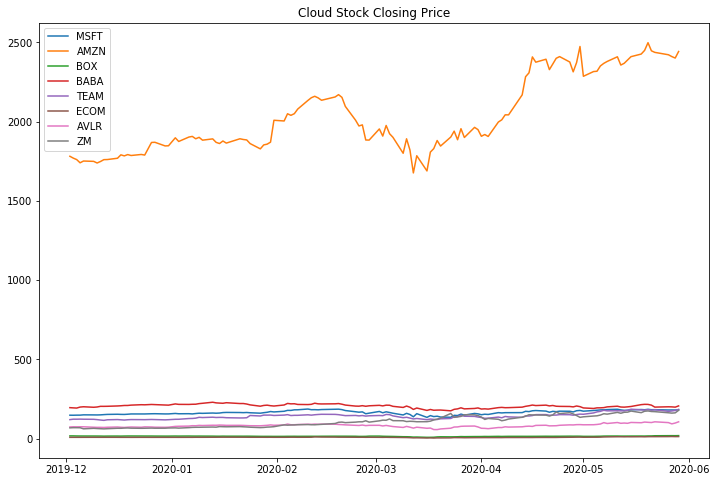

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title(title + ' Closing Price')
plt.legend(labels=df.columns)

In [10]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

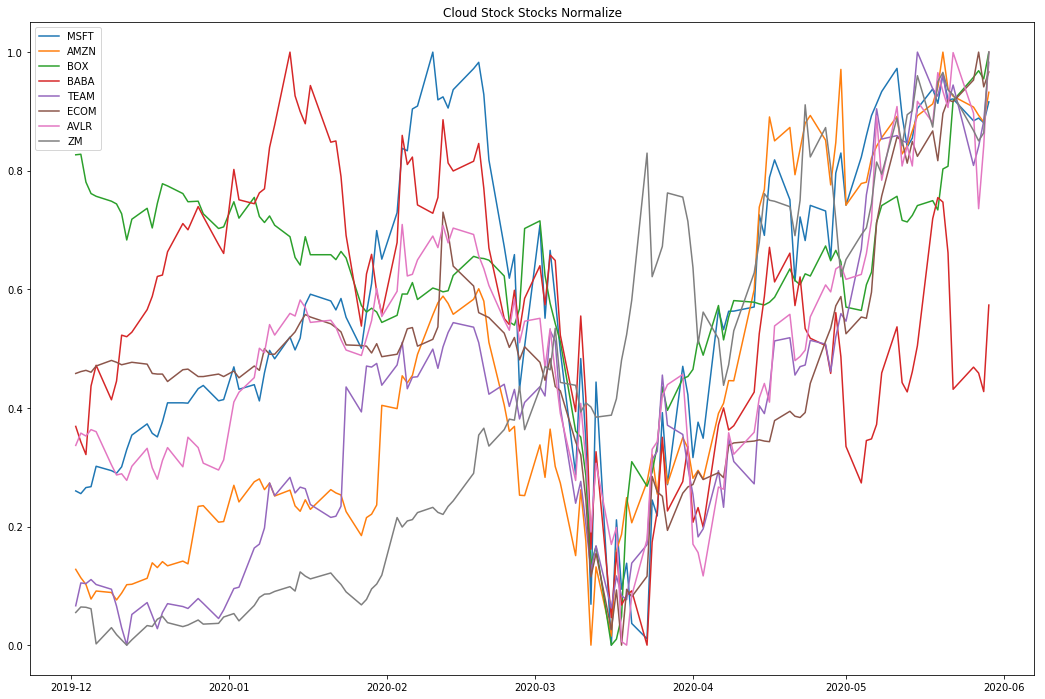

In [11]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(title + ' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [12]:
stock_rets = df.pct_change().dropna()

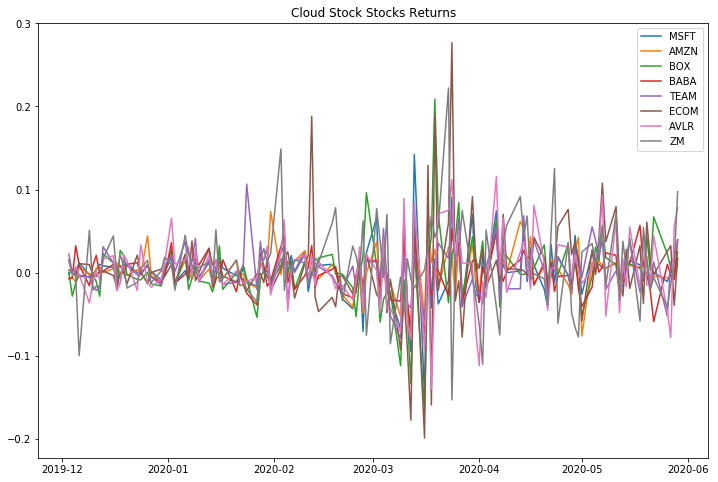

In [13]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title(title + ' Stocks Returns')
plt.legend(labels=stock_rets.columns)

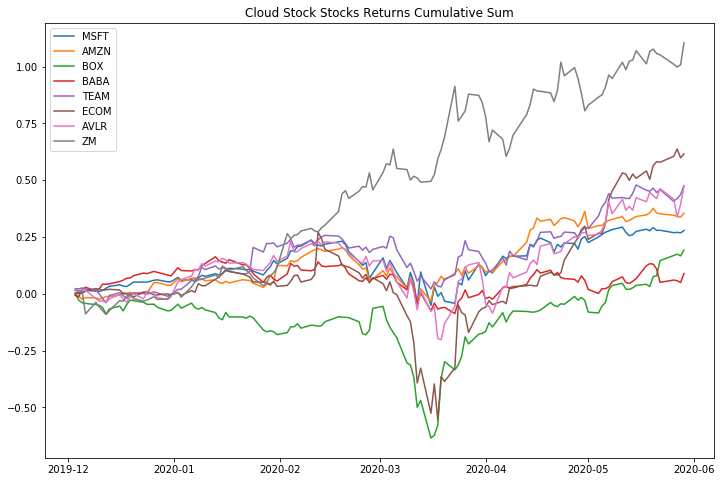

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title(title + ' Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

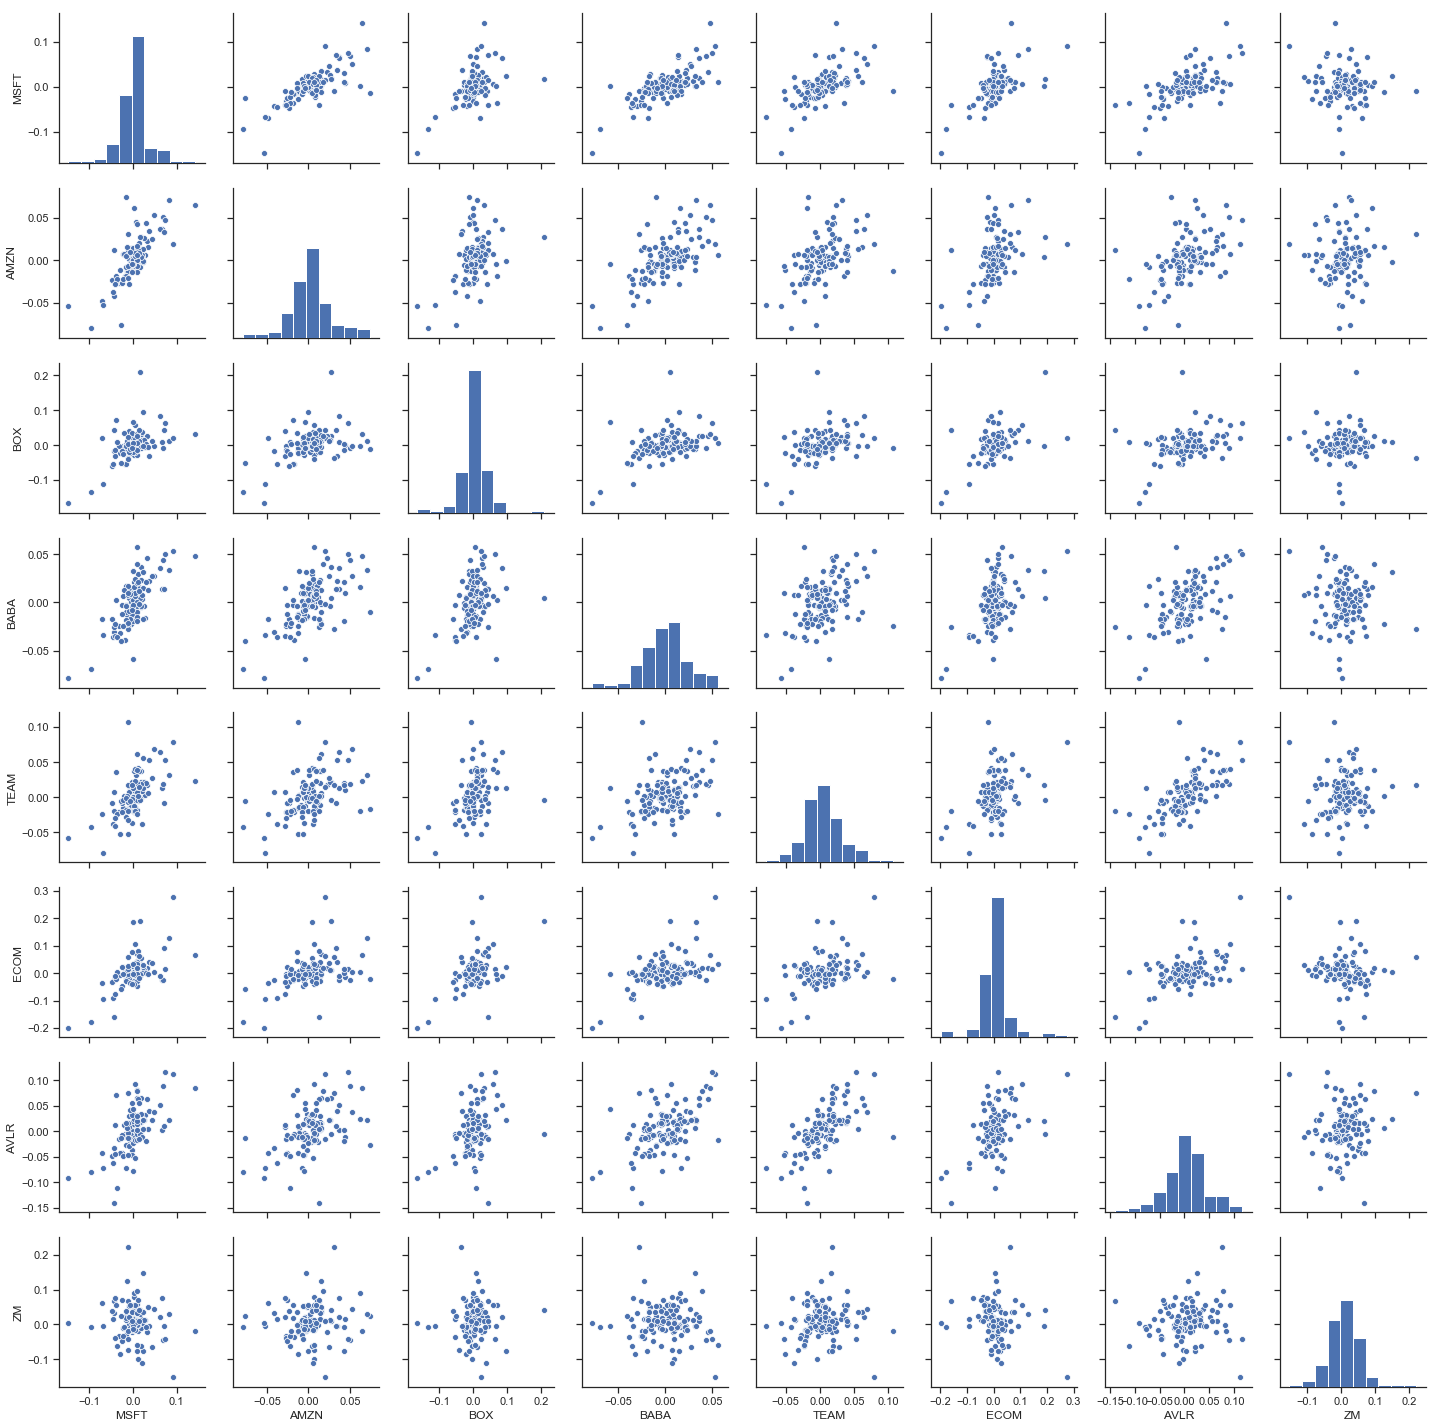

In [15]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

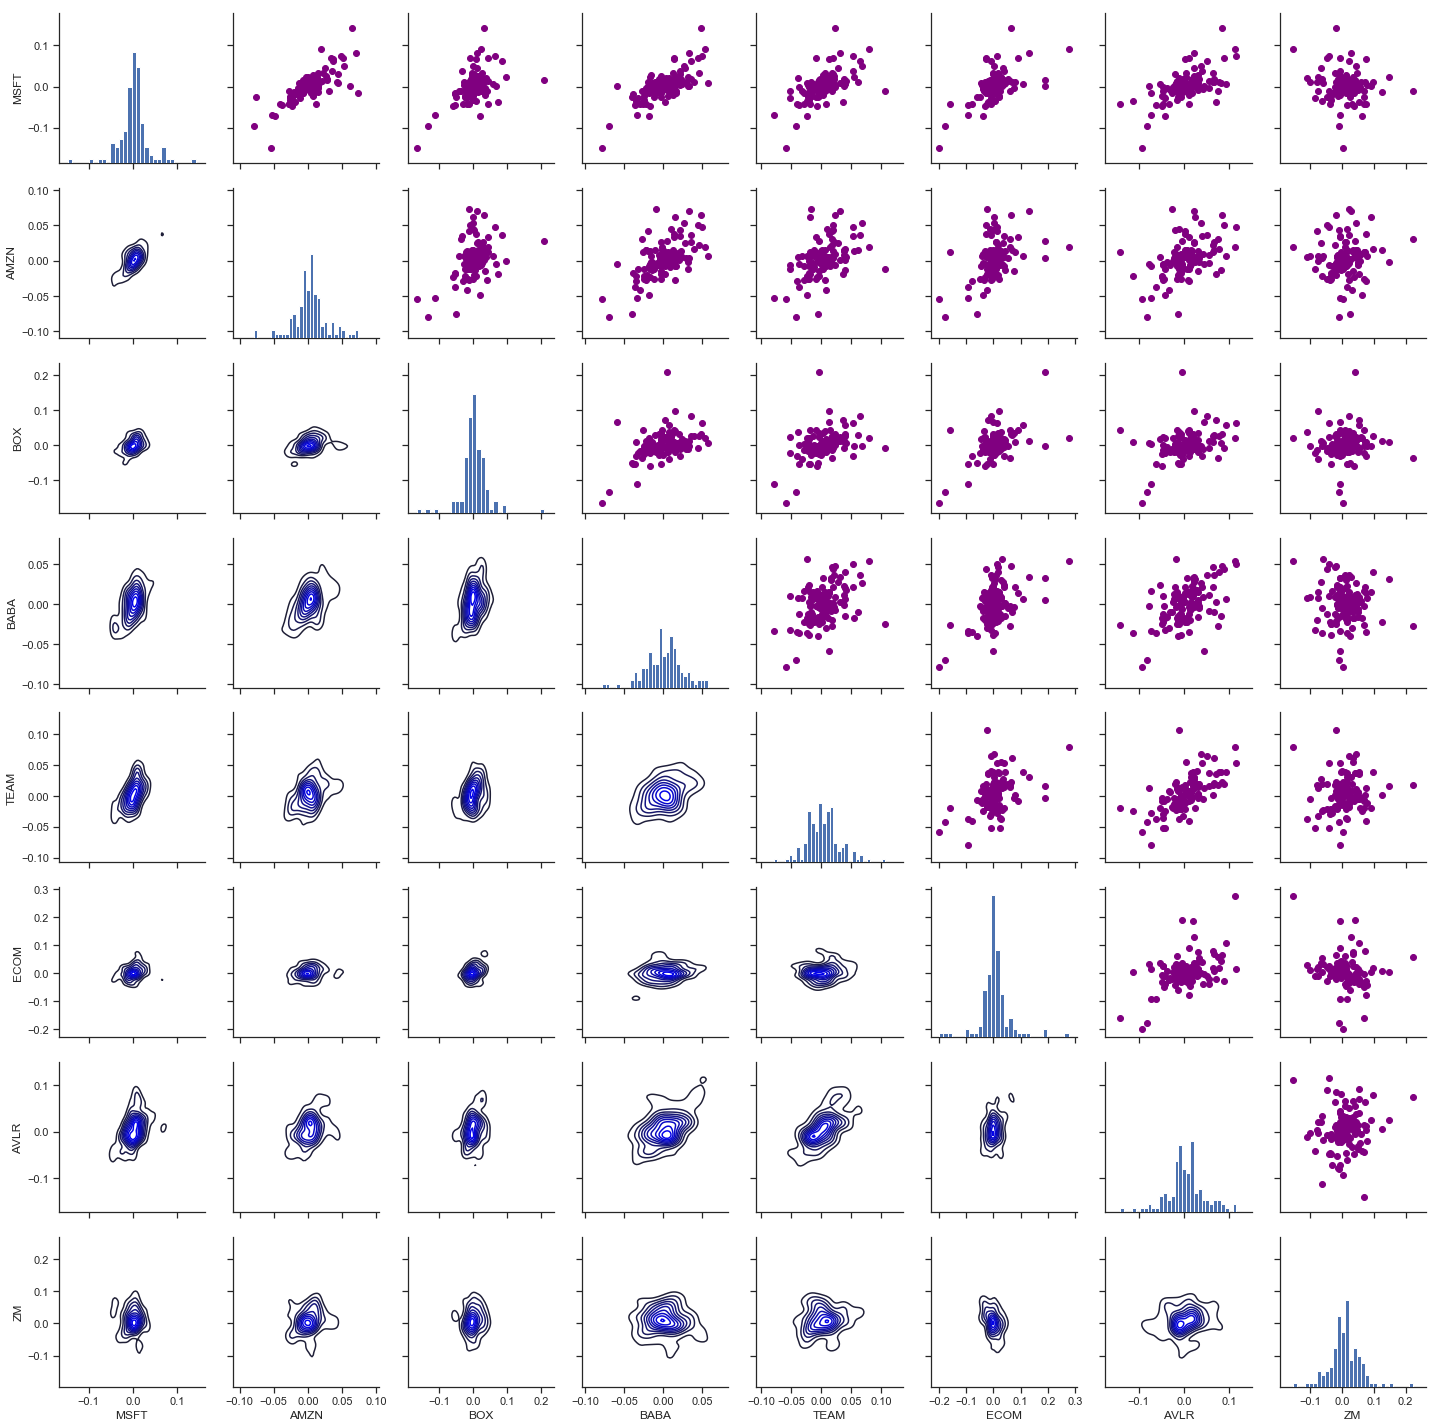

In [16]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

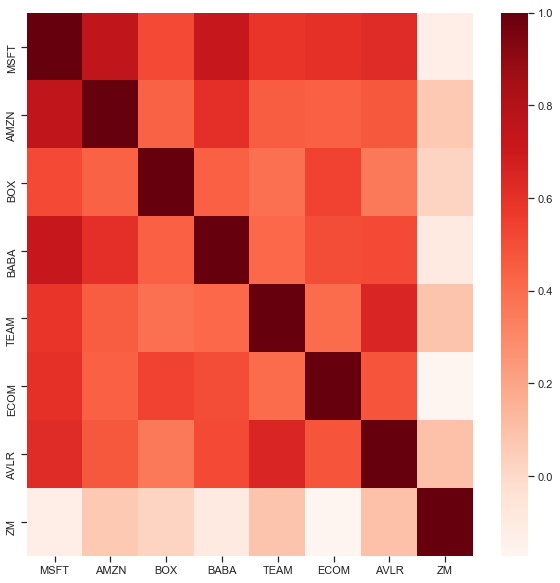

In [17]:
plt.figure(figsize=(10,10))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

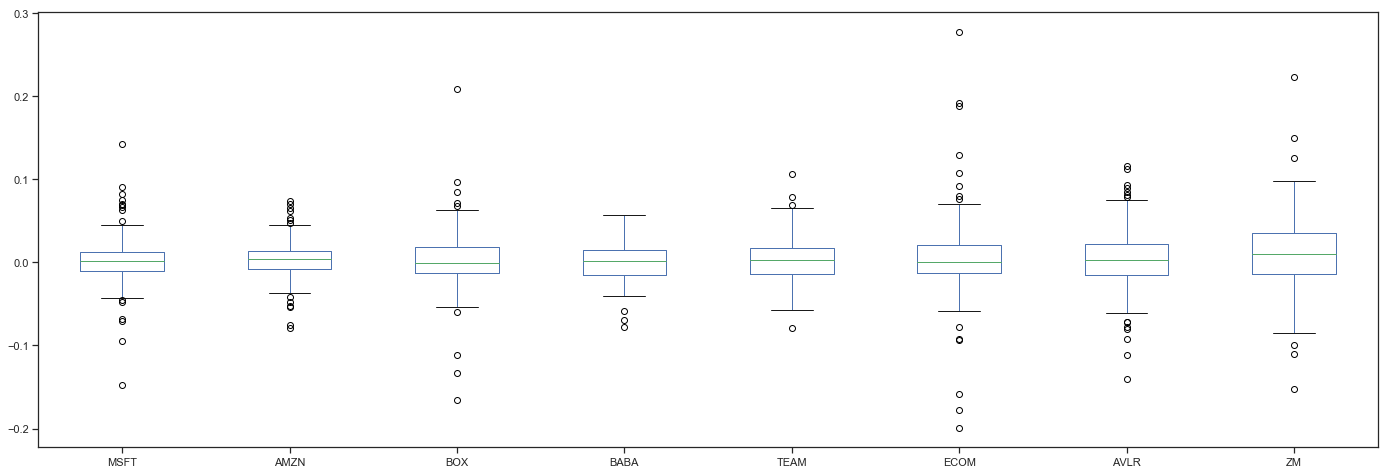

In [18]:
# Box plot
stock_rets.plot(kind='box',figsize=(24,8))

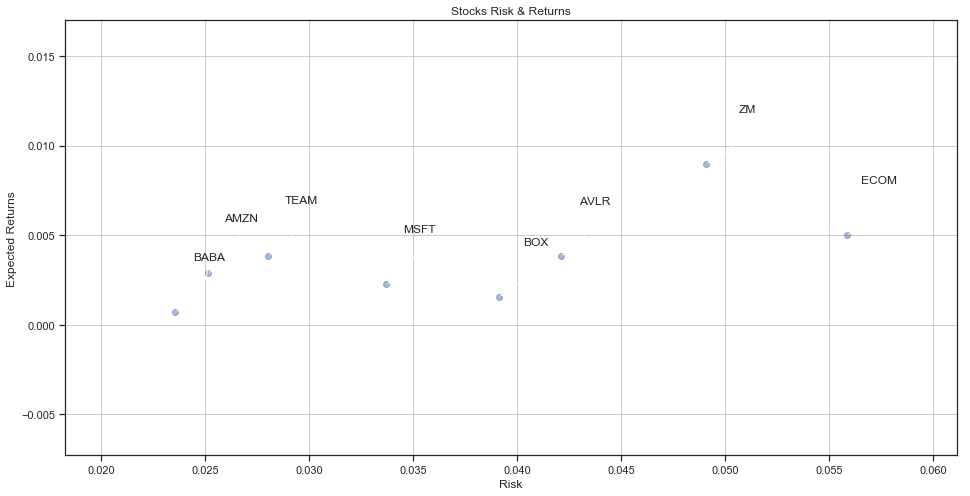

In [19]:
rets = stock_rets.dropna()

plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.std(), rets.mean()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

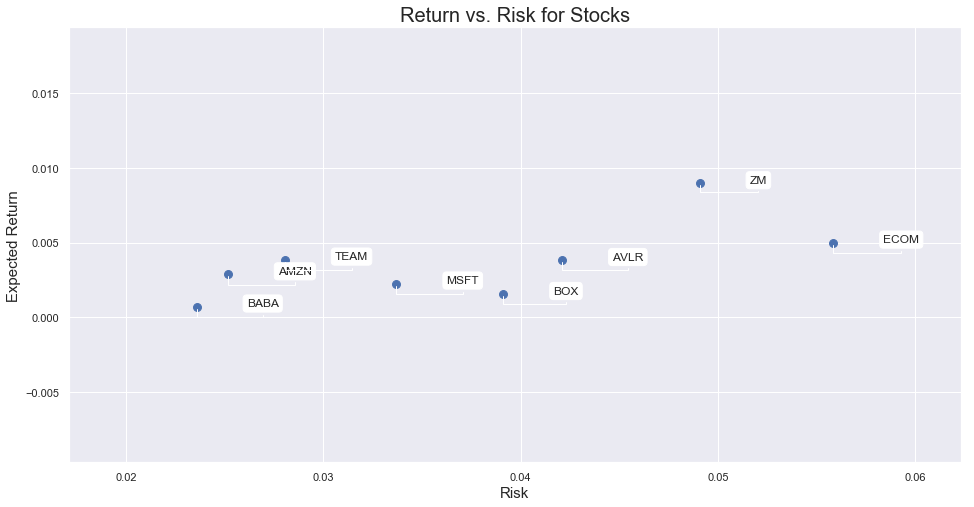

In [20]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(), s=area)
plt.xlabel("Risk", fontsize=15)
plt.ylabel("Expected Return", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.std(), rets.mean()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [21]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

ZM    ZM      1.000000
AVLR  AVLR    1.000000
AMZN  AMZN    1.000000
BOX   BOX     1.000000
BABA  BABA    1.000000
TEAM  TEAM    1.000000
ECOM  ECOM    1.000000
MSFT  MSFT    1.000000
AMZN  MSFT    0.751667
MSFT  AMZN    0.751667
BABA  MSFT    0.727818
MSFT  BABA    0.727818
AVLR  TEAM    0.649127
TEAM  AVLR    0.649127
MSFT  AVLR    0.621726
AVLR  MSFT    0.621726
AMZN  BABA    0.610477
BABA  AMZN    0.610477
ECOM  MSFT    0.602911
MSFT  ECOM    0.602911
      TEAM    0.583097
TEAM  MSFT    0.583097
ECOM  BOX     0.537930
BOX   ECOM    0.537930
AVLR  BABA    0.518445
BABA  AVLR    0.518445
MSFT  BOX     0.514382
BOX   MSFT    0.514382
ECOM  BABA    0.508249
BABA  ECOM    0.508249
                ...   
AMZN  TEAM    0.450339
TEAM  AMZN    0.450339
BOX   BABA    0.445309
BABA  BOX     0.445309
AMZN  ECOM    0.442798
ECOM  AMZN    0.442798
BOX   AMZN    0.439672
AMZN  BOX     0.439672
BABA  TEAM    0.418024
TEAM  BABA    0.418024
ECOM  TEAM    0.407615
TEAM  ECOM    0.407615
BOX   TEAM 

In [22]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,MSFT,AMZN,BOX,BABA,TEAM,ECOM,AVLR,ZM
Date,,,,,,,,
2019-12-03,0.503474,0.475043,0.444131,0.525086,0.545490,0.424976,0.600548,0.449612
2019-12-04,0.521506,0.483513,0.367378,0.534201,0.421017,0.422646,0.534521,0.405159
2019-12-05,0.510860,0.442726,0.410760,0.817536,0.445481,0.411127,0.574515,0.396391
2019-12-06,0.550939,0.559497,0.434969,0.648249,0.398832,0.441126,0.538182,0.142200
2019-12-09,0.500141,0.509944,0.428780,0.462737,0.400021,0.438591,0.404661,0.543452


In [23]:
Normalized_Value.corr()

,MSFT,AMZN,BOX,BABA,TEAM,ECOM,AVLR,ZM
MSFT,1.000000,0.751667,0.514382,0.727818,0.583097,0.602911,0.621726,-0.127018
AMZN,0.751667,1.000000,0.439672,0.610477,0.450339,0.442798,0.471472,0.069392
BOX,0.514382,0.439672,1.000000,0.445309,0.393006,0.537930,0.363039,0.027906
BABA,0.727818,0.610477,0.445309,1.000000,0.418024,0.508249,0.518445,-0.092025
TEAM,0.583097,0.450339,0.393006,0.418024,1.000000,0.407615,0.649127,0.087617
ECOM,0.602911,0.442798,0.537930,0.508249,0.407615,1.000000,0.480489,-0.173027
AVLR,0.621726,0.471472,0.363039,0.518445,0.649127,0.480489,1.000000,0.100528
ZM,-0.127018,0.069392,0.027906,-0.092025,0.087617,-0.173027,0.100528,1.000000


In [24]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

ZM    ZM      1.000000
AVLR  AVLR    1.000000
AMZN  AMZN    1.000000
BOX   BOX     1.000000
BABA  BABA    1.000000
TEAM  TEAM    1.000000
ECOM  ECOM    1.000000
MSFT  MSFT    1.000000
AMZN  MSFT    0.751667
MSFT  AMZN    0.751667
BABA  MSFT    0.727818
MSFT  BABA    0.727818
AVLR  TEAM    0.649127
TEAM  AVLR    0.649127
MSFT  AVLR    0.621726
AVLR  MSFT    0.621726
AMZN  BABA    0.610477
BABA  AMZN    0.610477
ECOM  MSFT    0.602911
MSFT  ECOM    0.602911
      TEAM    0.583097
TEAM  MSFT    0.583097
ECOM  BOX     0.537930
BOX   ECOM    0.537930
AVLR  BABA    0.518445
BABA  AVLR    0.518445
MSFT  BOX     0.514382
BOX   MSFT    0.514382
ECOM  BABA    0.508249
BABA  ECOM    0.508249
                ...   
AMZN  TEAM    0.450339
TEAM  AMZN    0.450339
BOX   BABA    0.445309
BABA  BOX     0.445309
AMZN  ECOM    0.442798
ECOM  AMZN    0.442798
BOX   AMZN    0.439672
AMZN  BOX     0.439672
BABA  TEAM    0.418024
TEAM  BABA    0.418024
ECOM  TEAM    0.407615
TEAM  ECOM    0.407615
BOX   TEAM 

In [25]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
MSFT    0.002263
AMZN    0.002881
BOX     0.001562
BABA    0.000723
TEAM    0.003868
ECOM    0.005007
AVLR    0.003840
ZM      0.008986
dtype: float64
--------------------------------------------------
Stock risks:
MSFT    0.033700
AMZN    0.025151
BOX     0.039116
BABA    0.023570
TEAM    0.028044
ECOM    0.055849
AVLR    0.042101
ZM      0.049077
dtype: float64


In [26]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
BABA,0.000723,0.023570
BOX,0.001562,0.039116
MSFT,0.002263,0.033700
AMZN,0.002881,0.025151
AVLR,0.003840,0.042101
TEAM,0.003868,0.028044
ECOM,0.005007,0.055849
ZM,0.008986,0.049077


In [27]:
table.sort_values(by='Risk')

,Returns,Risk
BABA,0.000723,0.023570
AMZN,0.002881,0.025151
TEAM,0.003868,0.028044
MSFT,0.002263,0.033700
BOX,0.001562,0.039116
AVLR,0.003840,0.042101
ZM,0.008986,0.049077
ECOM,0.005007,0.055849


In [28]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
MSFT,0.002263,0.033700,-0.229579
AMZN,0.002881,0.025151,-0.283029
BOX,0.001562,0.039116,-0.215711
BABA,0.000723,0.023570,-0.393575
TEAM,0.003868,0.028044,-0.218661
ECOM,0.005007,0.055849,-0.089397
AVLR,0.003840,0.042101,-0.146316
ZM,0.008986,0.049077,-0.020652


In [29]:
table['Max Returns'] = rets.max()

In [30]:
table['Min Returns'] = rets.min()

In [31]:
table['Median Returns'] = rets.median()

In [32]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
MSFT,0.002263,0.033700,-0.229579,0.142169,-0.147390,0.001828,1.019849
AMZN,0.002881,0.025151,-0.283029,0.073791,-0.079221,0.003638,1.718796
BOX,0.001562,0.039116,-0.215711,0.208506,-0.165599,-0.001301,2.514109
BABA,0.000723,0.023570,-0.393575,0.056952,-0.078093,0.001700,3.960095
TEAM,0.003868,0.028044,-0.218661,0.106680,-0.078692,0.002327,3.914309
ECOM,0.005007,0.055849,-0.089397,0.276632,-0.198708,0.000000,1.750545
AVLR,0.003840,0.042101,-0.146316,0.115826,-0.139837,0.002832,7.836421
ZM,0.008986,0.049077,-0.020652,0.222214,-0.152795,0.009621,9.740136


In [33]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
MSFT,0.002263,0.033700,-0.229579,0.142169,-0.147390,0.001828,1.019849,0.000057
AMZN,0.002881,0.025151,-0.283029,0.073791,-0.079221,0.003638,1.718796,0.000095
BOX,0.001562,0.039116,-0.215711,0.208506,-0.165599,-0.001301,2.514109,0.000139
BABA,0.000723,0.023570,-0.393575,0.056952,-0.078093,0.001700,3.960095,0.000217
TEAM,0.003868,0.028044,-0.218661,0.106680,-0.078692,0.002327,3.914309,0.000215
ECOM,0.005007,0.055849,-0.089397,0.276632,-0.198708,0.000000,1.750545,0.000097
AVLR,0.003840,0.042101,-0.146316,0.115826,-0.139837,0.002832,7.836421,0.000422
ZM,0.008986,0.049077,-0.020652,0.222214,-0.152795,0.009621,9.740136,0.000519


In [34]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
MSFT,0.002263,0.033700,-0.229579,0.142169,-0.147390,0.001828,1.019849,0.000057,0.341588
AMZN,0.002881,0.025151,-0.283029,0.073791,-0.079221,0.003638,1.718796,0.000095,0.559098
BOX,0.001562,0.039116,-0.215711,0.208506,-0.165599,-0.001301,2.514109,0.000139,0.149263
BABA,0.000723,0.023570,-0.393575,0.056952,-0.078093,0.001700,3.960095,0.000217,0.080364
TEAM,0.003868,0.028044,-0.218661,0.106680,-0.078692,0.002327,3.914309,0.000215,0.825504
ECOM,0.005007,0.055849,-0.089397,0.276632,-0.198708,0.000000,1.750545,0.000097,0.827550
AVLR,0.003840,0.042101,-0.146316,0.115826,-0.139837,0.002832,7.836421,0.000422,0.667637
ZM,0.008986,0.049077,-0.020652,0.222214,-0.152795,0.009621,9.740136,0.000519,2.846816


In [35]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
MSFT,0.002263,0.033700,-0.229579,0.142169,-0.147390,0.001828,1.019849,0.000057,0.341588
AMZN,0.002881,0.025151,-0.283029,0.073791,-0.079221,0.003638,1.718796,0.000095,0.559098
ECOM,0.005007,0.055849,-0.089397,0.276632,-0.198708,0.000000,1.750545,0.000097,0.827550
BOX,0.001562,0.039116,-0.215711,0.208506,-0.165599,-0.001301,2.514109,0.000139,0.149263
TEAM,0.003868,0.028044,-0.218661,0.106680,-0.078692,0.002327,3.914309,0.000215,0.825504
BABA,0.000723,0.023570,-0.393575,0.056952,-0.078093,0.001700,3.960095,0.000217,0.080364
AVLR,0.003840,0.042101,-0.146316,0.115826,-0.139837,0.002832,7.836421,0.000422,0.667637
ZM,0.008986,0.049077,-0.020652,0.222214,-0.152795,0.009621,9.740136,0.000519,2.846816
